# POC in a word perspective

## Main Algorithm:

1. Lemmatization

2. Protect stop words


3. // words (key phrases)   
Do:   
	Look for similar words (DBSCAN)   
Replace with centroid / one of the members   
Until Embedding distance is too high or utilization is too low.   


4. // sentences   
While K-anonymity is not reached:   
Find most similar sentences (Jaccard distance)   
Force them to be similar   

5. Do some utilization test / give some stats…


In [1]:
# For VSCODE
%reload_ext autoreload
%autoreload 2

## 0) Upload data

Import libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re

Import project files

In [3]:
#import sys
#sys.path.append("utils")
# from utils import models

In [4]:
from utils import nlp_utils, cluster_utils, utilization_utils, anonym_utils

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Uploading data

In [5]:
train_file = 'data/df_filtered_100.csv'
output_name = '100_example.csv'

Getting dataframe

In [6]:
%%time
# Getting the df
#df = reading_bz_file(train_file)
df = pd.read_csv(train_file)

CPU times: total: 15.6 ms
Wall time: 8 ms


## 1+2) Lemmatizing and protecting stopwords

Defininig the protected word list

In [7]:
wide_stop_words_range = False
if wide_stop_words_range:
    nlp_utils.add_word_list_to_stop_words('data/1000_most_common_words.txt')
print('Number of protected words:', len(nlp_utils.stopword_list))
print(nlp_utils.stopword_list[:10])

Number of protected words: 179
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]


Defining the word dictionary

In [8]:
%%time
word_dict = nlp_utils.create_word_dict(df['txt'])
word_list = cluster_utils.get_word_list_for_clustering(word_dict)

CPU times: total: 3.44 s
Wall time: 4.65 s


In [9]:
print('Number of different words:', len(word_dict))

Number of different words: 792


## 3) Word replacement

### 3.1) Clustering using DBSCAN

#### 3.1.1) Using DBSCAN with the default euclidean distance

Embedding the word list

In [10]:
embedded_dict = cluster_utils.embed_corpus(word_list)

Clustering

eps 1.7942904917429494
CPU times: total: 531 ms
Wall time: 499 ms


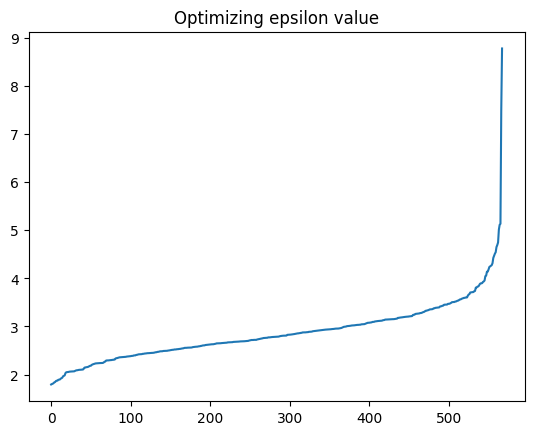

In [11]:
%%time

cluster_dict, dist_dict, labels = cluster_utils.run_clustering(embedded_dict)

In [12]:
#for key, val in dist_dict_2.items():
#    print('dist 1:', dist_dict[key], '\tdist 2:', dist_dict_2[key])

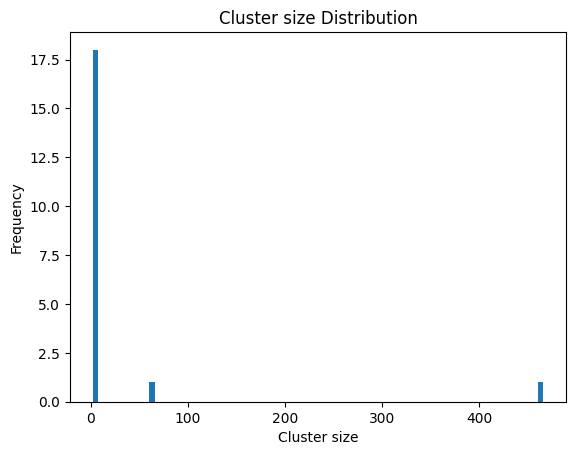

In [13]:
cluster_utils.plot_cluster_size_distribution(cluster_dict)

Plotting tSNE

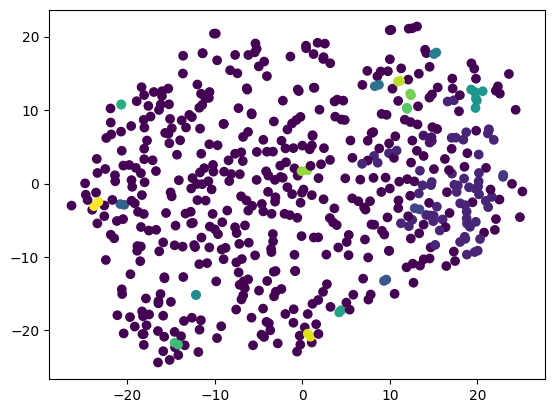

CPU times: total: 13.7 s
Wall time: 7 s


In [14]:
%%time
cluster_utils.plot_tsne(embedded_dict, labels)

#### 3.1.2) Using DBSCAN with cosine distance

Testing DBSCAN with cosine metric

eps 0.049182534


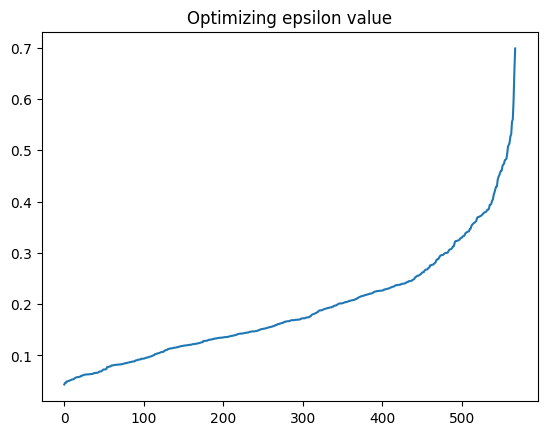

In [15]:
cluster_dict_cos, dist_dict_cos, labels_cos = cluster_utils.run_clustering(embedded_dict, cosine=True)

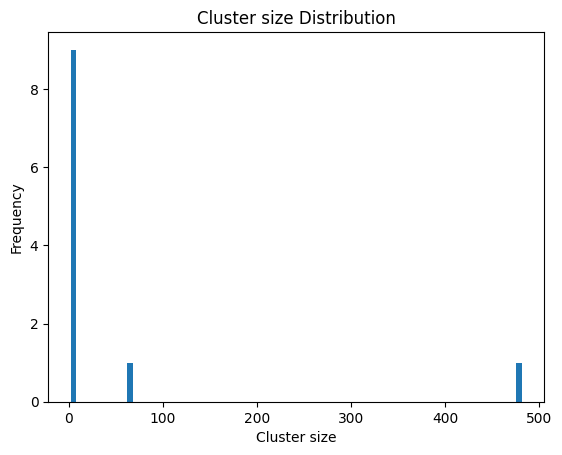

In [16]:
cluster_utils.plot_cluster_size_distribution(cluster_dict_cos)

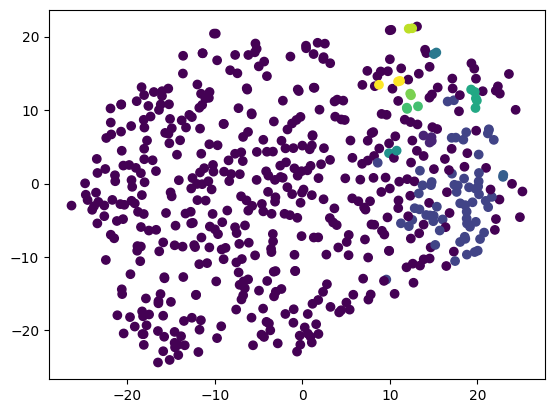

CPU times: total: 12.1 s
Wall time: 6.75 s


In [17]:
%%time
cluster_utils.plot_tsne(embedded_dict, labels_cos)

#### 3.1.3) Using HDBSCAN with UMAP

In [18]:
cluster_dict_h, dist_dict_h, labels_h = cluster_utils.run_clustering_hdbscan(embedded_dict)

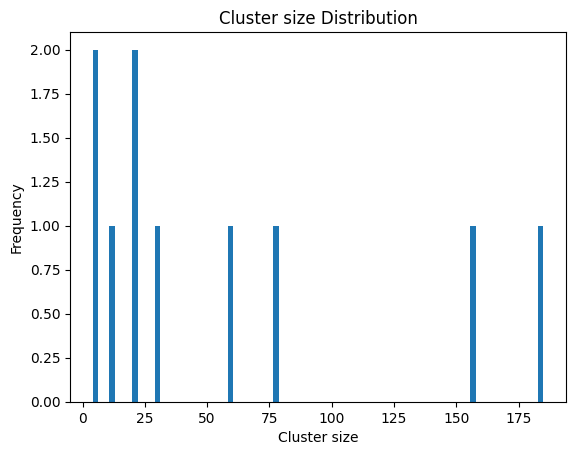

In [19]:
cluster_utils.plot_cluster_size_distribution(cluster_dict_h)

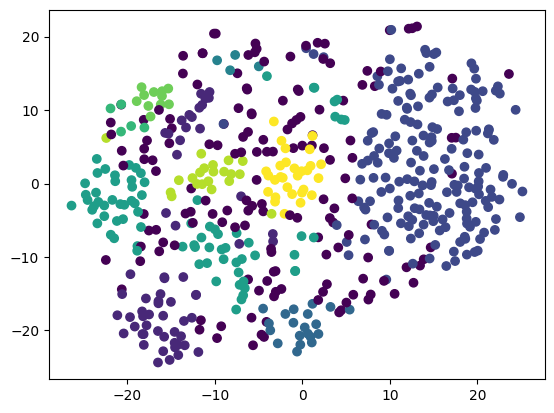

In [20]:
cluster_utils.plot_tsne(embedded_dict, labels_h)

#### 3.1.4) Comapirson

In [21]:
print('Euclidian distance:\t', len(cluster_dict), 'clusters')
print('Cosine distance:\t', len(cluster_dict_cos), 'clusters')
print('HDBSCAN clustering:\t', len(cluster_dict_h), 'clusters')

Euclidian distance:	 20 clusters
Cosine distance:	 11 clusters
HDBSCAN clustering:	 10 clusters


Plotting Jaccard index histogram

In [22]:
test_dict = nlp_utils.create_word_dict(['hi, how are you?', 'I love chocolate', 'I love banana', 'he loves cola'])
test_list = cluster_utils.get_word_list_for_clustering(test_dict)
test_list

['hi', 'cola', 'love', 'chocolate', 'banana']

Getting distance threshold

In [23]:
threshold = cluster_utils.define_max_threshold()
threshold

sim_list_best 0.82521856
sim_list_worst 0.56748897


0.3036462366580963

### 3.2) Replacing words in documents

#### 3.2.1) Based on Eucledian distance

In [24]:
######################### TEMP #######################
#df = df[:30]

Starting average Jaccard index: 0.11363696699052885
Distance threshold: 0.3036462366580963
distance: 0.15912066 	replacing ['since', 'already', 'almost', 'yesterday'] in left
distance: 0.29577538 	replacing ['talk', 'another', 'definitely', 'like', 'three', 'thing', 'know', 'always', 'break', 'still', 'bring', 'else', 'hope', 'every', 'lot', 'get', 'two', 'run', 'pretty', 'forget', 'hold', 'nothing', 'time', 'turn', 'take', 'think', 'look', 'especially', 'anyone', 'well', 'find', 'maybe', 'way', 'first', 'see', 'could', 'five', 'let', 'anything', 'hear', 'many', 'make', 'give', 'much', 'would', 'everything', 'something', 'really', 'ever', 'enough', 'go', 'actually', 'leave', 'whole', 'probably', 'remember', 'need', 'though', 'tell', 'might'] in there
distance: 0.14381038 	replacing ['keep', 'stay'] in always
distance: 0.14278841 	replacing ['exactly', 'wrong'] in reason
distance: 0.12698133 	replacing ['surprised', 'possibly'] in probably
distance: 0.13378102 	replacing ['quality', 'pr

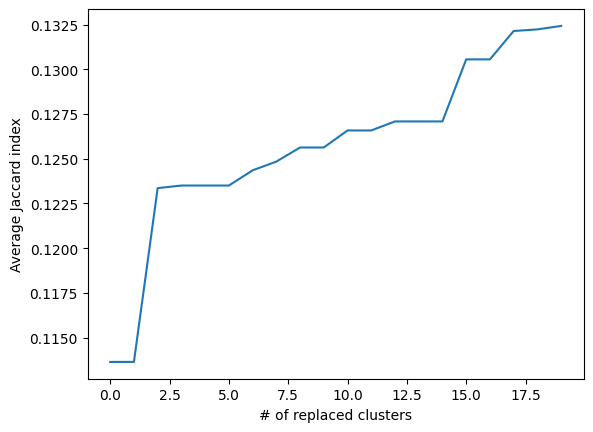

In [25]:
%%time
df_2, word_dict_2 = nlp_utils.replace_words_in_df(df, cluster_dict, dist_dict, threshold, word_dict)

In [26]:
df_2

,Unnamed: 0,txt,sentiment,num_of_words,anon_txt,anon_txt_history,num_replaced,num_lemmatized,num_protected,num_no_change
0,461,just awful: this was possibly the worst book i...,0,25,just awful : this was probably the bad book i ...,(just) awful: (this) (was) [probably] (the) {b...,2,3,14,6
1,493,no lessons learned: this is one of the most di...,0,23,no lesson learn : this is one of the most pred...,(no) {lesson} {learn} (this) (is) one (of) (th...,2,4,10,7
2,578,squeem: i ordered according to the size chart ...,0,21,squeem : i order accord to the size chart for ...,squeem: (i) {order} {accord} (to) (the) size c...,1,4,10,6
3,732,the scarlett letter: written in old english. i...,0,28,the scarlett letter : write in like english . ...,(the) scarlett letter: {write} (in) [like] eng...,2,3,17,6
4,852,don't read this book!!: this book sux! who car...,0,23,do not read this book ! ! : this book sux ! wh...,(don't) read (this) book!!: (this) book sux! (...,0,1,10,12
...,...,...,...,...,...,...,...,...,...,...
95,1951,great find: after long search for translation ...,1,27,great there : after long search for translatio...,great [there] (after) long search (for) transl...,2,4,10,11
96,1982,awesome costume: this is a great costume. all ...,1,22,best costume : this is a great costume . all t...,[best] costume: (this) (is) (a) great costume....,3,2,10,7
97,2107,great value: i got this for 40 something dolla...,1,23,great value : i there this for 40 there dollar...,great value: (i) {get} (this) (for) 40 [there]...,2,2,10,9
98,2116,spider-man - the motion picture dvd triology: ...,1,26,spider - man - the motion picture hd triology ...,spider-man - (the) motion picture [hd] triolog...,2,3,13,8


#### 3.2.2) Based on Cosine distance

Starting average Jaccard index: 0.11363696699052885
Distance threshold: 0.3036462366580963
distance: 0.15912066 	replacing ['since', 'already', 'almost', 'yesterday'] in left
distance: 0.29366222 	replacing ['talk', 'exactly', 'surprised', 'another', 'definitely', 'like', 'three', 'thing', 'know', 'always', 'still', 'bring', 'else', 'hope', 'every', 'lot', 'get', 'say', 'two', 'pretty', 'forget', 'nothing', 'turn', 'take', 'think', 'look', 'especially', 'must', 'anyone', 'well', 'find', 'maybe', 'way', 'first', 'see', 'could', 'five', 'let', 'anything', 'hear', 'many', 'never', 'make', 'give', 'much', 'would', 'everything', 'something', 'really', 'ever', 'enough', 'go', 'actually', 'leave', 'wrong', 'whole', 'probably', 'remember', 'need', 'though', 'tell', 'might'] in there
distance: 0.14381038 	replacing ['keep', 'stay'] in always
distance: 0.13329369 	replacing ['birthday', 'happy'] in thank
distance: 0.13503933 	replacing ['break', 'time'] in take
distance: 0.18802203 	replacing ['

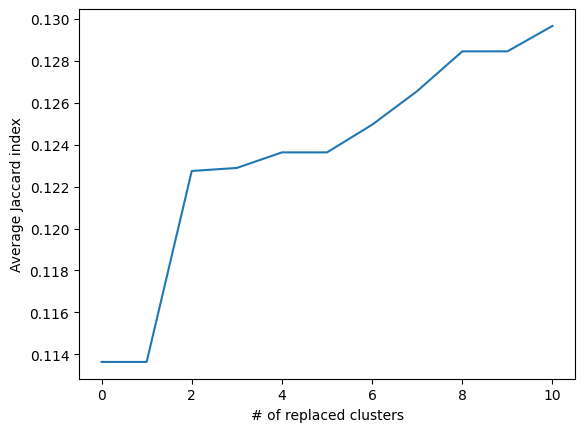

In [27]:
%%time
df_3, word_dict_3 = nlp_utils.replace_words_in_df(df, cluster_dict_cos, dist_dict_cos, threshold, word_dict)

In [28]:
df_3

,Unnamed: 0,txt,sentiment,num_of_words,anon_txt,anon_txt_history,num_replaced,num_lemmatized,num_protected,num_no_change
0,461,just awful: this was possibly the worst book i...,0,25,just awful : this was possibly the bad book i ...,(just) awful: (this) (was) [probably] (the) {b...,2,3,14,6
1,493,no lessons learned: this is one of the most di...,0,23,no lesson learn : this is one of the most disa...,(no) {lesson} {learn} (this) (is) one (of) (th...,2,4,10,7
2,578,squeem: i ordered according to the size chart ...,0,21,squeem : i order accord to the size chart for ...,squeem: (i) {order} {accord} (to) (the) size c...,1,4,10,6
3,732,the scarlett letter: written in old english. i...,0,28,the scarlett letter : write in like english . ...,(the) scarlett letter: {write} (in) [like] eng...,2,3,17,6
4,852,don't read this book!!: this book sux! who car...,0,23,do not read this book ! ! : this book sux ! wh...,(don't) read (this) book!!: (this) book sux! (...,0,1,10,12
...,...,...,...,...,...,...,...,...,...,...
95,1951,great find: after long search for translation ...,1,27,great there : after long search for translatio...,great [there] (after) long search (for) transl...,2,4,10,11
96,1982,awesome costume: this is a great costume. all ...,1,22,great costume : this is a great costume . all ...,[great] costume: (this) (is) (a) great costume...,3,2,10,7
97,2107,great value: i got this for 40 something dolla...,1,23,great value : i there this for 40 there dollar...,great value: (i) {get} (this) (for) 40 [there]...,2,2,10,9
98,2116,spider-man - the motion picture dvd triology: ...,1,26,spider - man - the motion picture dvd triology...,spider-man - (the) motion picture [hd] triolog...,2,3,13,8


#### 3.2.3) Based on HDBSCAN clustering

Starting average Jaccard index: 0.11363696699052885
Distance threshold: 0.3036462366580963
distance: 0.3853647 the next cluster is too wide and wont be replaced: ['transformer', 'remote', 'battery', 'cable', 'drawer', 'cord', 'xl', 'curve', 'bead', 'pocket', 'garbage', 'inch', 'tape', 'waterproof', 'speed', 'monitor', 'printer', 'rotate', 'fireplace', 'accord', 'helmet']
distance: 0.52262545 the next cluster is too wide and wont be replaced: ['painstakingly', 'tale', 'tmnt', 'laughoutloud', 'recommendable', 'stray', 'actionmovie', 'fiction', 'cincher', 'iraqi', 'grandson', 'bratz', 'montale', 'hunt', 'autobiography', 'tuscan', 'storie', 'scarlett', 'unimaginative', 'amish', 'character', 'nirvana', 'fiord', 'remastere', 'granddaughter', 'docker', 'thia', 'romanticism', 'bluegrass', 'trite', 'damme', 'sandler', 'cornwell', 'phillip', 'mellow', 'electrodance', 'vampire', 'suspense', 'triology', 'spiderman', 'scarpetta', 'mesmerize', 'waster', 'encounter', 'legendary', 'charlie', 'deaf', '

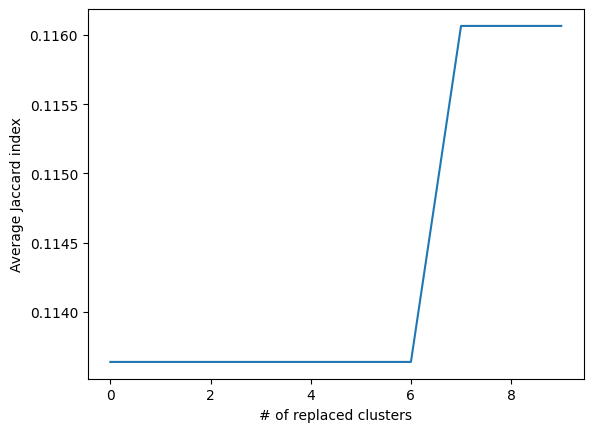

In [29]:
%%time
df_4, word_dict_4 = nlp_utils.replace_words_in_df(df, cluster_dict_h, dist_dict_h, threshold, word_dict)

In [30]:
df_4

,Unnamed: 0,txt,sentiment,num_of_words,anon_txt,anon_txt_history,num_replaced,num_lemmatized,num_protected,num_no_change
0,461,just awful: this was possibly the worst book i...,0,25,just awful : this was possibly the bad book i ...,(just) awful: (this) (was) [probably] (the) {b...,2,3,14,6
1,493,no lessons learned: this is one of the most di...,0,23,no lesson learn : this is one of the most disa...,(no) {lesson} {learn} (this) (is) one (of) (th...,2,4,10,7
2,578,squeem: i ordered according to the size chart ...,0,21,squeem : i order accord to the size chart for ...,squeem: (i) {order} {accord} (to) (the) size c...,1,4,10,6
3,732,the scarlett letter: written in old english. i...,0,28,the scarlett letter : write in old english . i...,(the) scarlett letter: {write} (in) [like] eng...,2,3,17,6
4,852,don't read this book!!: this book sux! who car...,0,23,do not read this book ! ! : this book sux ! wh...,(don't) read (this) book!!: (this) book sux! (...,0,1,10,12
...,...,...,...,...,...,...,...,...,...,...
95,1951,great find: after long search for translation ...,1,27,great find : after long search for translation...,great [there] (after) long search (for) transl...,2,4,10,11
96,1982,awesome costume: this is a great costume. all ...,1,22,awesome costume : this is a great costume . al...,[great] costume: (this) (is) (a) great costume...,3,2,10,7
97,2107,great value: i got this for 40 something dolla...,1,23,great value : i get this for 40 something doll...,great value: (i) {get} (this) (for) 40 [there]...,2,2,10,9
98,2116,spider-man - the motion picture dvd triology: ...,1,26,spider - man - the motion picture dvd triology...,spider-man - (the) motion picture [hd] triolog...,2,3,13,8


Looking at the histogram again

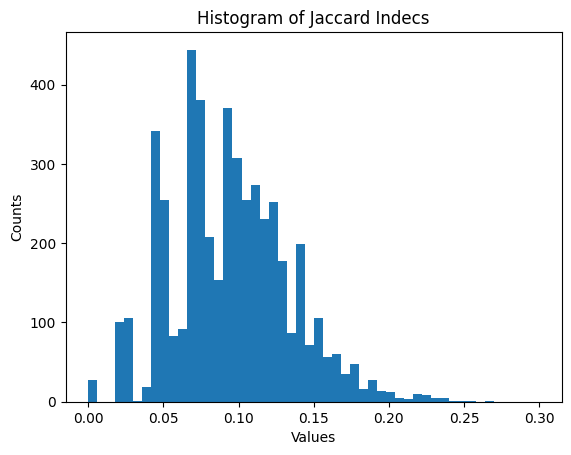

CPU times: total: 469 ms
Wall time: 567 ms


In [31]:
%%time
nlp_utils.plot_jaccard_hist(df_2, column='txt')

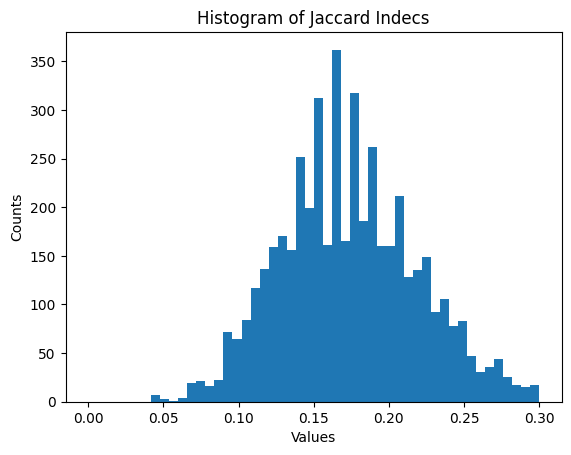

CPU times: total: 516 ms
Wall time: 567 ms


In [32]:
%%time
nlp_utils.plot_jaccard_hist(df_2, 'anon_txt')

For eucledian distance

In [33]:
protected, lemma, replaced, all_words = nlp_utils.get_stat(word_dict_2)
print(f'Protected: {protected}\tLemmatized: {lemma}\t Replaced: {replaced}\t All: {all_words}')

Protected: 102	Lemmatized: 207	 Replaced: 107	 All: 801


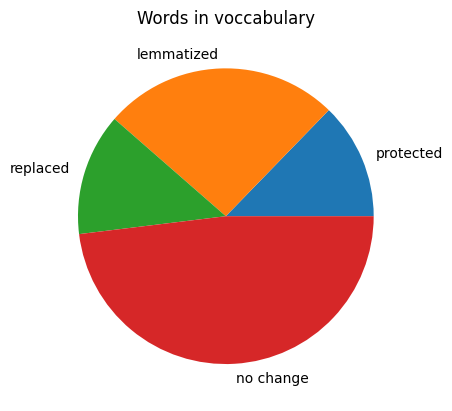

In [34]:
y = np.array([protected, lemma, replaced, (all_words - protected - lemma - replaced)])
mylabels = ['protected', 'lemmatized', 'replaced', 'no change']

plt.pie(y, labels = mylabels)
plt.title('Words in voccabulary')
plt.show()

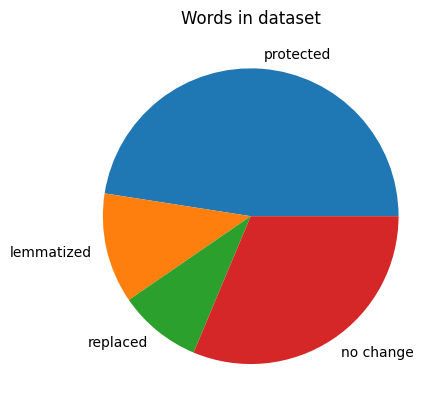

In [35]:
y = np.array([df_2['num_protected'].sum(), df_2['num_lemmatized'].sum(), df_2['num_replaced'].sum(), df_2['num_no_change'].sum()])
mylabels = ['protected', 'lemmatized', 'replaced', 'no change']

plt.pie(y, labels = mylabels)
plt.title('Words in dataset')
plt.show()

## 4) Force anonymity

### Get anonymity degree

Before replacement

In [36]:
curr_k, non_anon_indexes = anonym_utils.get_anonym_degree(docs=df_2['txt'])
print('Current k:', curr_k, '\tnumber of un-anonym. documents:', len(non_anon_indexes), '\tnumber of all documents:', len(df_2['txt']))

Current k: 1 	number of un-anonym. documents: 100 	number of all documents: 100


After replacement

In [37]:
curr_k, non_anon_indexes = anonym_utils.get_anonym_degree(docs=df_2['anon_txt'])
print('Current k:', curr_k, '\tnumber of un-anonym. documents:', len(non_anon_indexes), '\tnumber of all documents:', len(df_2['anon_txt']))

Current k: 1 	number of un-anonym. documents: 100 	number of all documents: 100


### Steps:
1. Finding k nearest neighbors using approximate nearest neighbors
2. Finding the different words between the neighbors
2. Replacing the different words with *

In [38]:
anonym_utils.delete_uncommon_words(['I love choco', 'I love banana'])


['I love *', 'I love *']

In [39]:
anonym_utils.force_anonym_using_annoy(['I love choco', 'I love banana', 'lalala'], k=2)

Start: get_anonym_degree: 1
similar_doc_ind [0, 1]
Breaking after moving over 2 of all 3 indexes.
unused_indexes: [2]
End: get_anonym_degree: 1


['I love *', 'I love *', '*']

In [40]:
force_anon_txt_annoy = anonym_utils.force_anonym_using_annoy(df_2['anon_txt'], k=2)
anonym_utils.get_anonym_degree(force_anon_txt_annoy)

Start: get_anonym_degree: 1
similar_doc_ind [0, 77]
similar_doc_ind [1, 40]
similar_doc_ind [2, 16]
similar_doc_ind [3, 46]
similar_doc_ind [4, 19]
similar_doc_ind [5, 9]
similar_doc_ind [6, 7]
similar_doc_ind [8, 44]
similar_doc_ind [10, 43]
similar_doc_ind [11, 21]
similar_doc_ind [12, 70]
similar_doc_ind [13, 89]
similar_doc_ind [14, 25]
similar_doc_ind [15, 52]
similar_doc_ind [17, 96]
similar_doc_ind [18, 71]
similar_doc_ind [20, 31]
similar_doc_ind [22, 53]
similar_doc_ind [23, 56]
similar_doc_ind [24, 30]
similar_doc_ind [26, 74]
similar_doc_ind [27, 84]
similar_doc_ind [28, 54]
similar_doc_ind [29, 69]
similar_doc_ind [32, 47]
similar_doc_ind [33, 93]
similar_doc_ind [34, 92]
similar_doc_ind [35, 81]
similar_doc_ind [36, 60]
similar_doc_ind [37, 49]
similar_doc_ind [38, 85]
similar_doc_ind [39, 57]
similar_doc_ind [41, 68]
similar_doc_ind [42, 91]
similar_doc_ind [45, 64]
similar_doc_ind [48, 66]
similar_doc_ind [50, 62]
similar_doc_ind [51, 72]
similar_doc_ind [55, 58]
similar

(2,
 [[55, 58],
  [82, 88],
  [26, 74],
  [45, 64],
  [13, 89],
  [5, 9],
  [27, 84],
  [33, 93],
  [35, 81],
  [36, 60],
  [32, 47],
  [3, 46],
  [34, 92],
  [8, 44],
  [1, 40],
  [38, 85],
  [28, 54],
  [17, 96],
  [12, 70],
  [23, 56],
  [29, 69],
  [48, 66],
  [76, 80],
  [2, 16],
  [6, 7],
  [42, 91],
  [41, 68],
  [10, 43],
  [4, 19],
  [51, 72],
  [0, 77],
  [73, 90],
  [11, 21],
  [18, 71],
  [15, 52],
  [37, 49],
  [24, 30],
  [20, 31],
  [50, 62],
  [83, 95],
  [59, 99],
  [14, 25]])

In [41]:
curr_k, non_anon_indexes = anonym_utils.get_anonym_degree(force_anon_txt_annoy)
print('Current k:', curr_k, '\tnumber of un-anonym. documents:', len(non_anon_indexes), '\tnumber of all documents:', len(df_2['txt']))

Current k: 2 	number of un-anonym. documents: 42 	number of all documents: 100


In [42]:
df_2['force_anon_txt'] = force_anon_txt_annoy
# Counting the number of words and *
df_2['num_of_words_after_forcing'] = df_2['force_anon_txt'].apply(lambda x: len(re.findall(r'\w+', x)))
df_2['num_of_deleting_after_forcing'] = df_2['force_anon_txt'].apply(lambda x: len(re.findall(r'\*', x)))

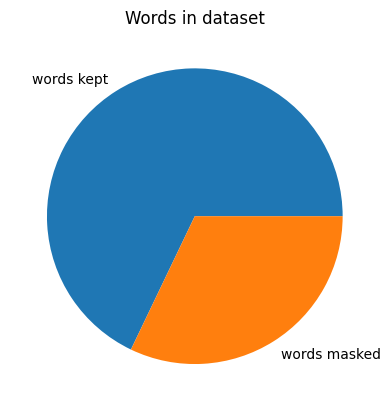

In [43]:
y = np.array([df_2['num_of_words_after_forcing'].sum(), df_2['num_of_deleting_after_forcing'].sum()])
mylabels = ['words kept', 'words masked']

plt.pie(y, labels = mylabels)
plt.title('Words in dataset')
plt.show()

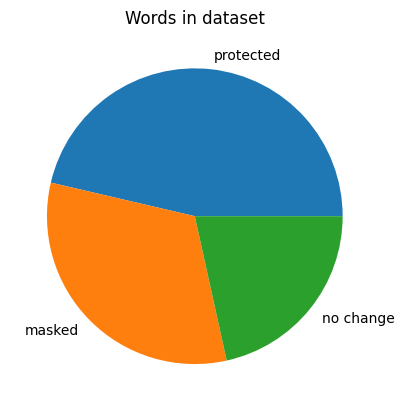

In [44]:
y = np.array([df_2['num_protected'].sum(), df_2['num_of_deleting_after_forcing'].sum(), (df_2['num_of_words_after_forcing'] - df_2['num_protected']).sum()])
mylabels = ['protected', 'masked', 'no change']

plt.pie(y, labels = mylabels)
plt.title('Words in dataset')
plt.show()

In [45]:
i = 1
print(df_2['txt'][i])
print(df_2['anon_txt_history'][i])
print(df_2['force_anon_txt'][i])

no lessons learned: this is one of the most disappointing purchases i have made on amazon.the book is one long, myopic, libertarian apology.
(no) {lesson} {learn} (this) (is) one (of) (the) (most) [predictable] {purchase} (i) (have) {make} (on) amazon.the book (is) one long, [illusive] libertarian apology. 
no * * : this is * of * most predictable include i have there on *.* * is * * , * , * * .


## 5) Utilization tests

In [46]:
df_21 = utilization_utils.get_vader_sentiment_for_df(df_2, ['txt', 'anon_txt', 'force_anon_txt'])
df_21

,Unnamed: 0,txt,sentiment,num_of_words,anon_txt,anon_txt_history,num_replaced,num_lemmatized,num_protected,num_no_change,force_anon_txt,num_of_words_after_forcing,num_of_deleting_after_forcing,txt_vader_sentiment_pred,anon_txt_vader_sentiment_pred,force_anon_txt_vader_sentiment_pred
0,461,just awful: this was possibly the worst book i...,0,25,just awful : this was probably the bad book i ...,(just) awful: (this) (was) [probably] (the) {b...,2,3,14,6,just * : this was * the * book i have there * ...,17,8,-0.5574,-0.1779,0.0000
1,493,no lessons learned: this is one of the most di...,0,23,no lesson learn : this is one of the most pred...,(no) {lesson} {learn} (this) (is) one (of) (th...,2,4,10,7,no * * : this is * of * most predictable inclu...,12,12,-0.5563,-0.0258,-0.2960
2,578,squeem: i ordered according to the size chart ...,0,21,squeem : i order accord to the size chart for ...,squeem: (i) {order} {accord} (to) (the) size c...,1,4,10,6,* : i order * to the size chart for my * and i...,16,6,0.0000,0.0000,0.0000
3,732,the scarlett letter: written in old english. i...,0,28,the scarlett letter : write in like english . ...,(the) scarlett letter: {write} (in) [like] eng...,2,3,17,6,the * * : write in like * . it was very * to r...,21,7,-0.0516,0.3400,0.3612
4,852,don't read this book!!: this book sux! who car...,0,23,do not read this book ! ! : this book sux ! wh...,(don't) read (this) book!!: (this) book sux! (...,0,1,10,12,do not read this book ! ! : this book * ! who ...,15,9,-0.8507,-0.8429,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1951,great find: after long search for translation ...,1,27,great there : after long search for translatio...,great [there] (after) long search (for) transl...,2,4,10,11,"* there : after * * for * of * 's * , this * *...",15,13,0.9100,0.9100,0.0000
96,1982,awesome costume: this is a great costume. all ...,1,22,best costume : this is a great costume . all t...,[best] costume: (this) (is) (a) great costume....,3,2,10,7,* * : this is a great * . all the * * there it...,15,7,0.9460,0.9468,0.8481
97,2107,great value: i got this for 40 something dolla...,1,23,great value : i there this for 40 there dollar...,great value: (i) {get} (this) (for) 40 [there]...,2,2,10,9,* * : i there this for * there * and it was a ...,13,10,0.9403,0.9403,0.0000
98,2116,spider-man - the motion picture dvd triology: ...,1,26,spider - man - the motion picture hd triology ...,spider-man - (the) motion picture [hd] triolog...,2,3,13,8,* - * - the * * * * : this * was a * and i am ...,15,11,0.4404,0.4404,0.0000


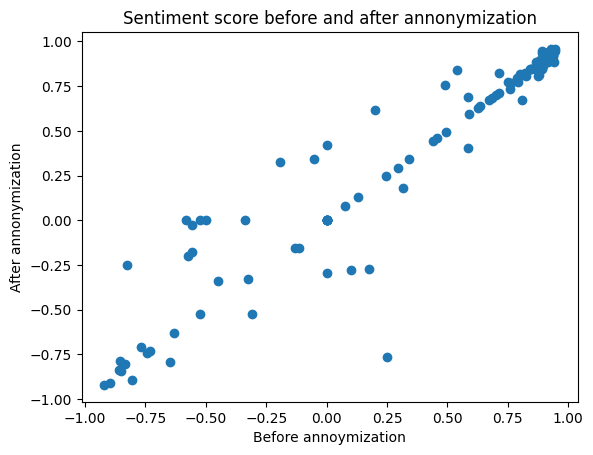

In [47]:
import matplotlib.pyplot as plt

plt.scatter(df_21['txt_vader_sentiment_pred'], df_21['anon_txt_vader_sentiment_pred'])
plt.xlabel('Before annoymization')
plt.ylabel('After annonymization')
plt.title('Sentiment score before and after annonymization');


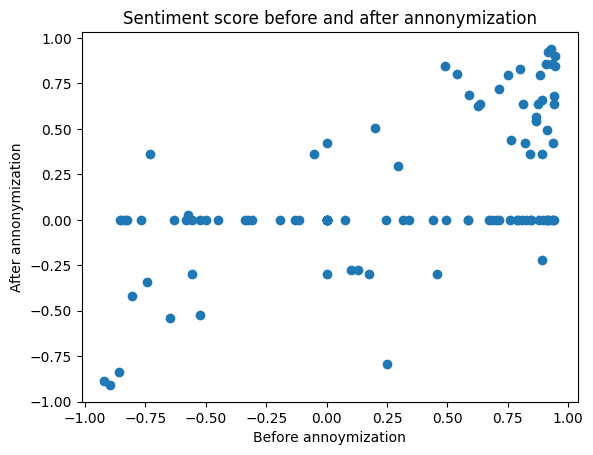

In [48]:
plt.scatter(df_21['txt_vader_sentiment_pred'], df_21['force_anon_txt_vader_sentiment_pred'])
plt.xlabel('Before annoymization')
plt.ylabel('After annonymization')
plt.title('Sentiment score before and after annonymization');


In [49]:
utilization_utils.sentiment_test(df_2, 'txt')

0.8100961538461539

In [50]:
utilization_utils.sentiment_test(df_2, 'anon_txt')

0.8205128205128205

The fully anonymized text gets he highest accuracy score!

In [51]:
utilization_utils.sentiment_test(df_2, 'force_anon_txt')

0.6963141025641026

## Saving output

In [52]:
filename = 'outputs/' + output_name
df_2.to_csv(filename, index=False)

## TEMP and tries

In [53]:
print(nlp_utils.stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [54]:
len(nlp_utils.stopwords.words('english'))

179

In [55]:
len(nlp_utils.stopword_list)

179

In [56]:
nlp_utils.add_word_list_to_stop_words('data/1000_most_common_words.txt')
len(nlp_utils.stopword_list)

1075

### Using XGBoost

In [57]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import cross_val_score


# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(df["txt"], df["sentiment"], test_size=0.2, random_state=42)

# Use CountVectorizer to convert the text data into numerical features
vectorizer = CountVectorizer(stop_words="english")
X_train_vect = vectorizer.fit_transform(X_train)
X_test_vect = vectorizer.transform(X_test)

# Train an XGBoost model on the training set
model = xgb.XGBClassifier()
model.fit(X_train_vect, y_train)

# Evaluate the model on the test set
y_pred = model.predict(X_test_vect)
accuracy = np.mean(y_pred == y_test)
print("Accuracy:", accuracy)



Accuracy: 0.75


In [58]:
X = vectorizer.fit_transform(df["txt"])
y = df["sentiment"]
scores = cross_val_score(model, X, y, cv=5)
print("Cross-validation scores:", scores)
print("Mean cross-validation score:", np.mean(scores))

Cross-validation scores: [0.65 0.35 0.6  0.9  0.75]
Mean cross-validation score: 0.65


In [59]:
X = vectorizer.fit_transform(df_2["force_anon_txt"])
y = df_2["sentiment"]
scores = cross_val_score(model, X, y, cv=5)
print("Cross-validation scores:", scores)
print("Mean cross-validation score:", np.mean(scores))

Cross-validation scores: [0.55 0.3  0.5  0.45 0.6 ]
Mean cross-validation score: 0.48
